**Life Expectancy Data.csv**  


The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

- Country
- Year
- Status : Developed or Developing status
- Life expectancy : Life Expectancy in age
- Adult Mortality : Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- infant deaths : Number of Infant Deaths per 1000 population
- Alcohol : Alcohol recorded per capita (15+) consumption (in litres of pure alcohol)
- percentage expenditure : Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- Hepatitis B : Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
- Measles : Measles - number of reported cases per 1000 population
- BMI: Average Body Mass Index of entire population
- under-five deaths: Number of under-five deaths per 1000 population
- Polio : Polio (Pol3) immunization coverage among 1-year-olds (%)
- Total expenditure : General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria : Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV/AIDS : Deaths per 1 000 live births HIV/AIDS (0-4 years)
- GDP : Gross Domestic Product per capita (in USD)
- Population : Population of the country
- thinness 10-19 years : Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
- thinness 5-9 years : Prevalence of thinness among children for Age 5 to 9(%)
- Income composition of resources : Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling : Number of years of Schooling(years)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

## 데이터 준비 단계

In [2]:

life_data = pd.read_csv('Life Expectancy Data.csv')
life_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [3]:
life_data.columns = ['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
                     'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B',
                     'Measles', 'BMI', 'Under5_Deaths', 'Polio', 'Total_Expenditure',
                     'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'Thinness_10_19_Years', 'Thinness_5_9_years',
                     'Income_Composition_Of_Resources', 'Schooling']

life_data['Country']=life_data['Country'].astype('category')
life_data['Status']=life_data['Status'].astype('category')

life_data.head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness_10_19_Years,Thinness_5_9_years,Income_Composition_Of_Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
life_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null category
Year                               2938 non-null int64
Status                             2938 non-null category
Life_Expectancy                    2928 non-null float64
Adult_Mortality                    2928 non-null float64
Infant_Deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
Percentage_Expenditure             2938 non-null float64
Hepatitis_B                        2385 non-null float64
Measles                            2938 non-null int64
BMI                                2904 non-null float64
Under5_Deaths                      2938 non-null int64
Polio                              2919 non-null float64
Total_Expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
HIV_AIDS                           2938 non-

## 전처리

### 이상치 및 결측치

In [5]:
life_data.describe().iloc[:, 1:]

,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,Under5_Deaths,Polio,Total_Expenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness_10_19_Years,Thinness_5_9_years,Income_Composition_Of_Resources,Schooling
count,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


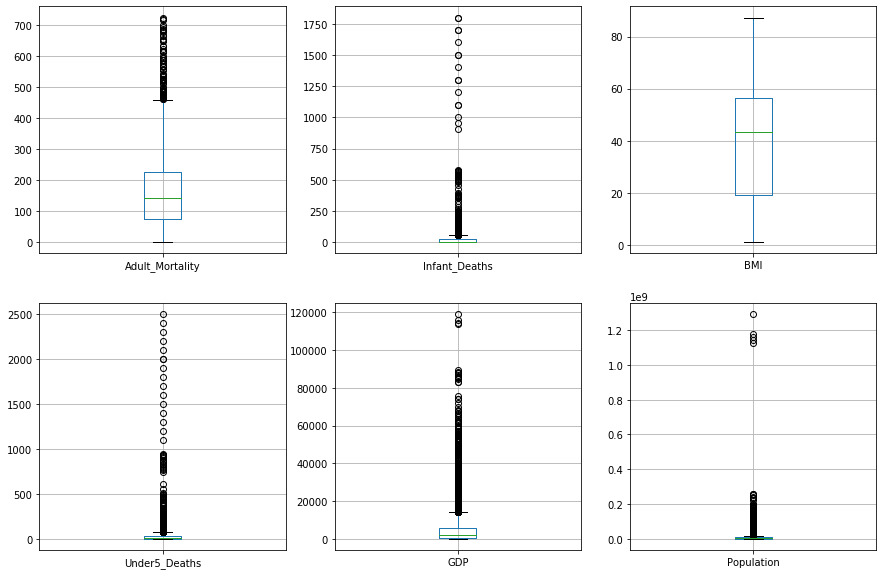

In [6]:
# 이상치 확인 그래프

plt.figure(figsize=(15,10))
for i, col in enumerate(['Adult_Mortality', 'Infant_Deaths', 'BMI', 'Under5_Deaths', 'GDP', 'Population'], start=1):
    plt.subplot(2, 3, i)
    life_data.boxplot(col)

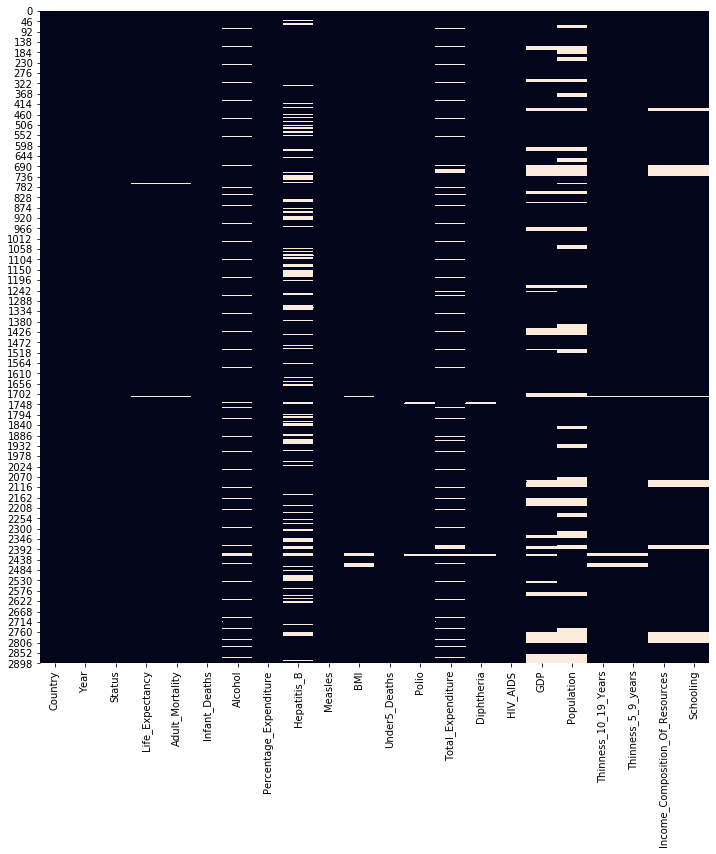

In [7]:
# 결측 분포 파악
plt.figure(figsize=(12,12))
sns.heatmap(life_data.isnull(),cbar=False)

In [8]:
# 각 열의 결측 개수와 비율 출력 함수

def null_column_percentage(df):
    df_cols = list(df.columns)
    cols_total_count = len(list(df.columns))
    cols_count = 0
    for loc, col in enumerate(df_cols):
        null_count = df[col].isnull().sum()
        total_count = df[col].isnull().count()
        percent_null = round(null_count/total_count*100, 2)
        if null_count > 0:
            cols_count += 1
            print('[iloc = {}] {} has {} null values: {}% null'.format(loc, col, null_count, percent_null))
    cols_percent_null = round(cols_count/cols_total_count*100, 2)
    print('Out of {} total columns, {} contain null values; {}% columns contain null values.'.format(cols_total_count, cols_count, cols_percent_null))
    
null_column_percentage(life_data)

[iloc = 3] Life_Expectancy has 10 null values: 0.34% null
[iloc = 4] Adult_Mortality has 10 null values: 0.34% null
[iloc = 6] Alcohol has 194 null values: 6.6% null
[iloc = 8] Hepatitis_B has 553 null values: 18.82% null
[iloc = 10] BMI has 34 null values: 1.16% null
[iloc = 12] Polio has 19 null values: 0.65% null
[iloc = 13] Total_Expenditure has 226 null values: 7.69% null
[iloc = 14] Diphtheria has 19 null values: 0.65% null
[iloc = 16] GDP has 448 null values: 15.25% null
[iloc = 17] Population has 652 null values: 22.19% null
[iloc = 18] Thinness_10_19_Years has 34 null values: 1.16% null
[iloc = 19] Thinness_5_9_years has 34 null values: 1.16% null
[iloc = 20] Income_Composition_Of_Resources has 167 null values: 5.68% null
[iloc = 21] Schooling has 163 null values: 5.55% null
Out of 22 total columns, 14 contain null values; 63.64% columns contain null values.


In [9]:
life_data.drop(columns='BMI', inplace=True)

결측 비율이 50%가 넘는 BMI 열은 삭제

In [10]:
# 연도별로 각 열의 중앙값으로 결측치 대체 함수

life_impute = []    # 결측치가 대체된 데이터를 저장하는 리스트

for Year in list(life_data.Year.unique()):
    year_data = life_data[life_data.Year == Year].copy()
    for col in list(year_data.columns)[3:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().median()).copy()
    life_impute.append(year_data)
    
life_data = pd.concat(life_impute).copy()

In [11]:
null_column_percentage(life_data)

Out of 21 total columns, 0 contain null values; 0.0% columns contain null values.


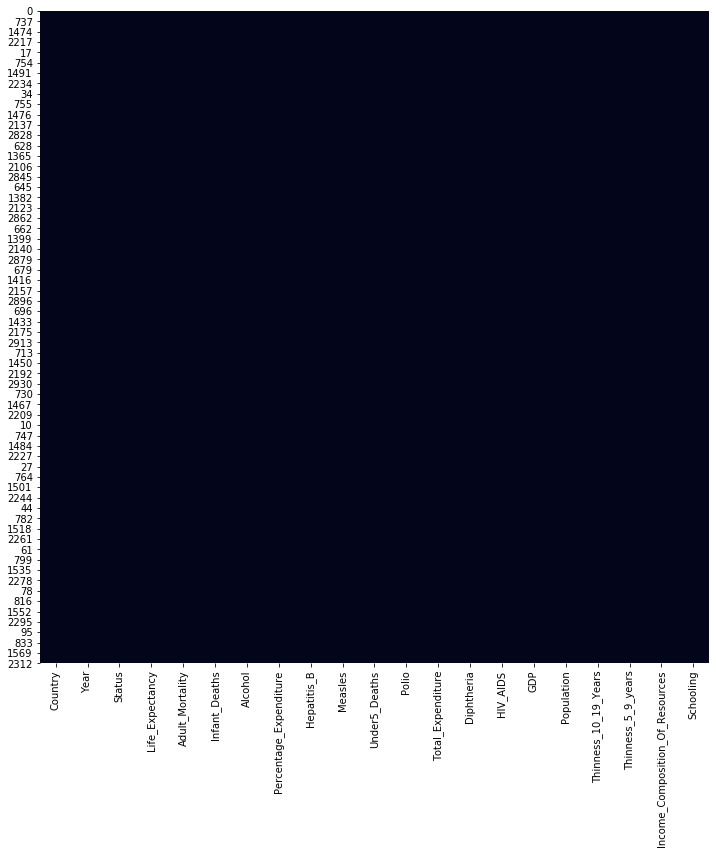

In [12]:
plt.figure(figsize=(12,12))
sns.heatmap(life_data.isnull(),cbar=False)

결측치 대체 완료

### 변수 분포

In [13]:
# 나라명, 연도, 국가 상태 변수는 제외 => 설명변수, 반응변수 역할을 할 수 있는 변수만 남김
var = list(life_data.columns)[3:]

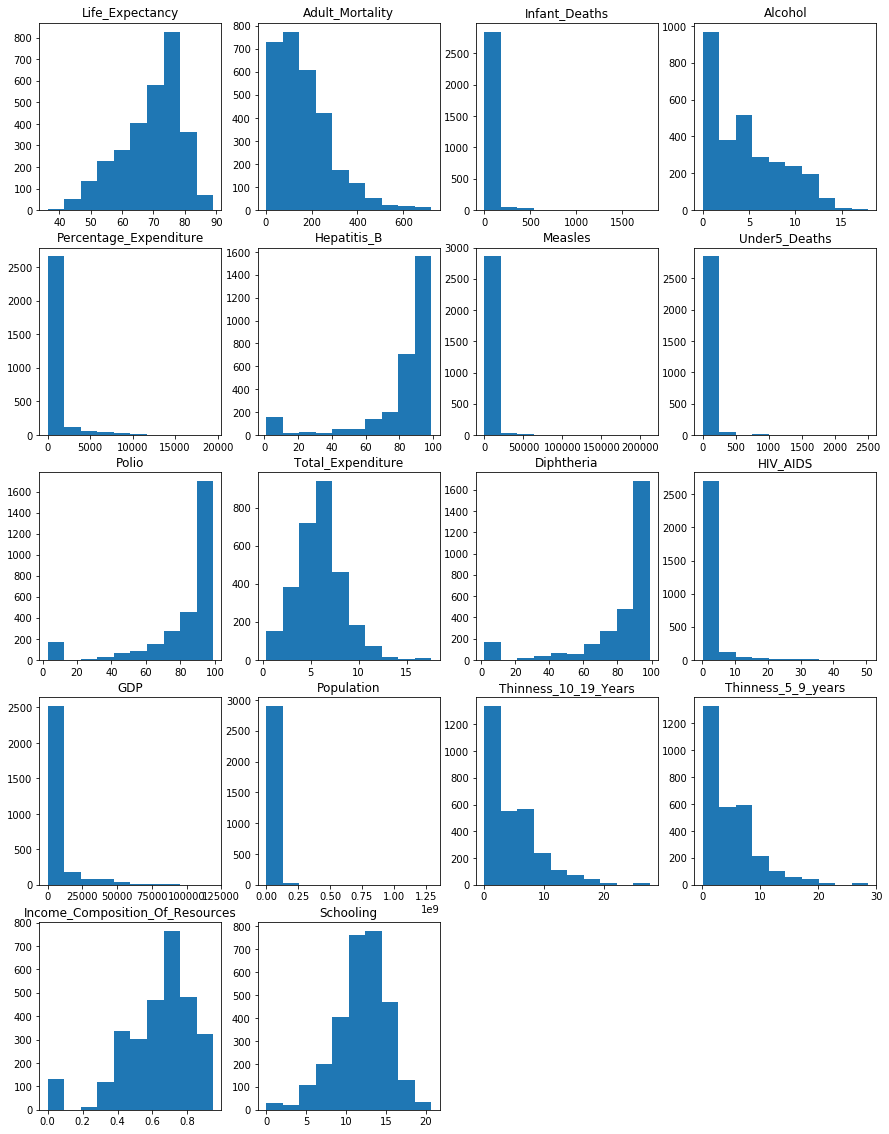

In [14]:
# 변수들 히스토그램
plt.figure(figsize=(15, 20))

for i, col in enumerate(var, 1):
    plt.subplot(5, 4, i)
    plt.hist(life_data[col])
    plt.title(col)

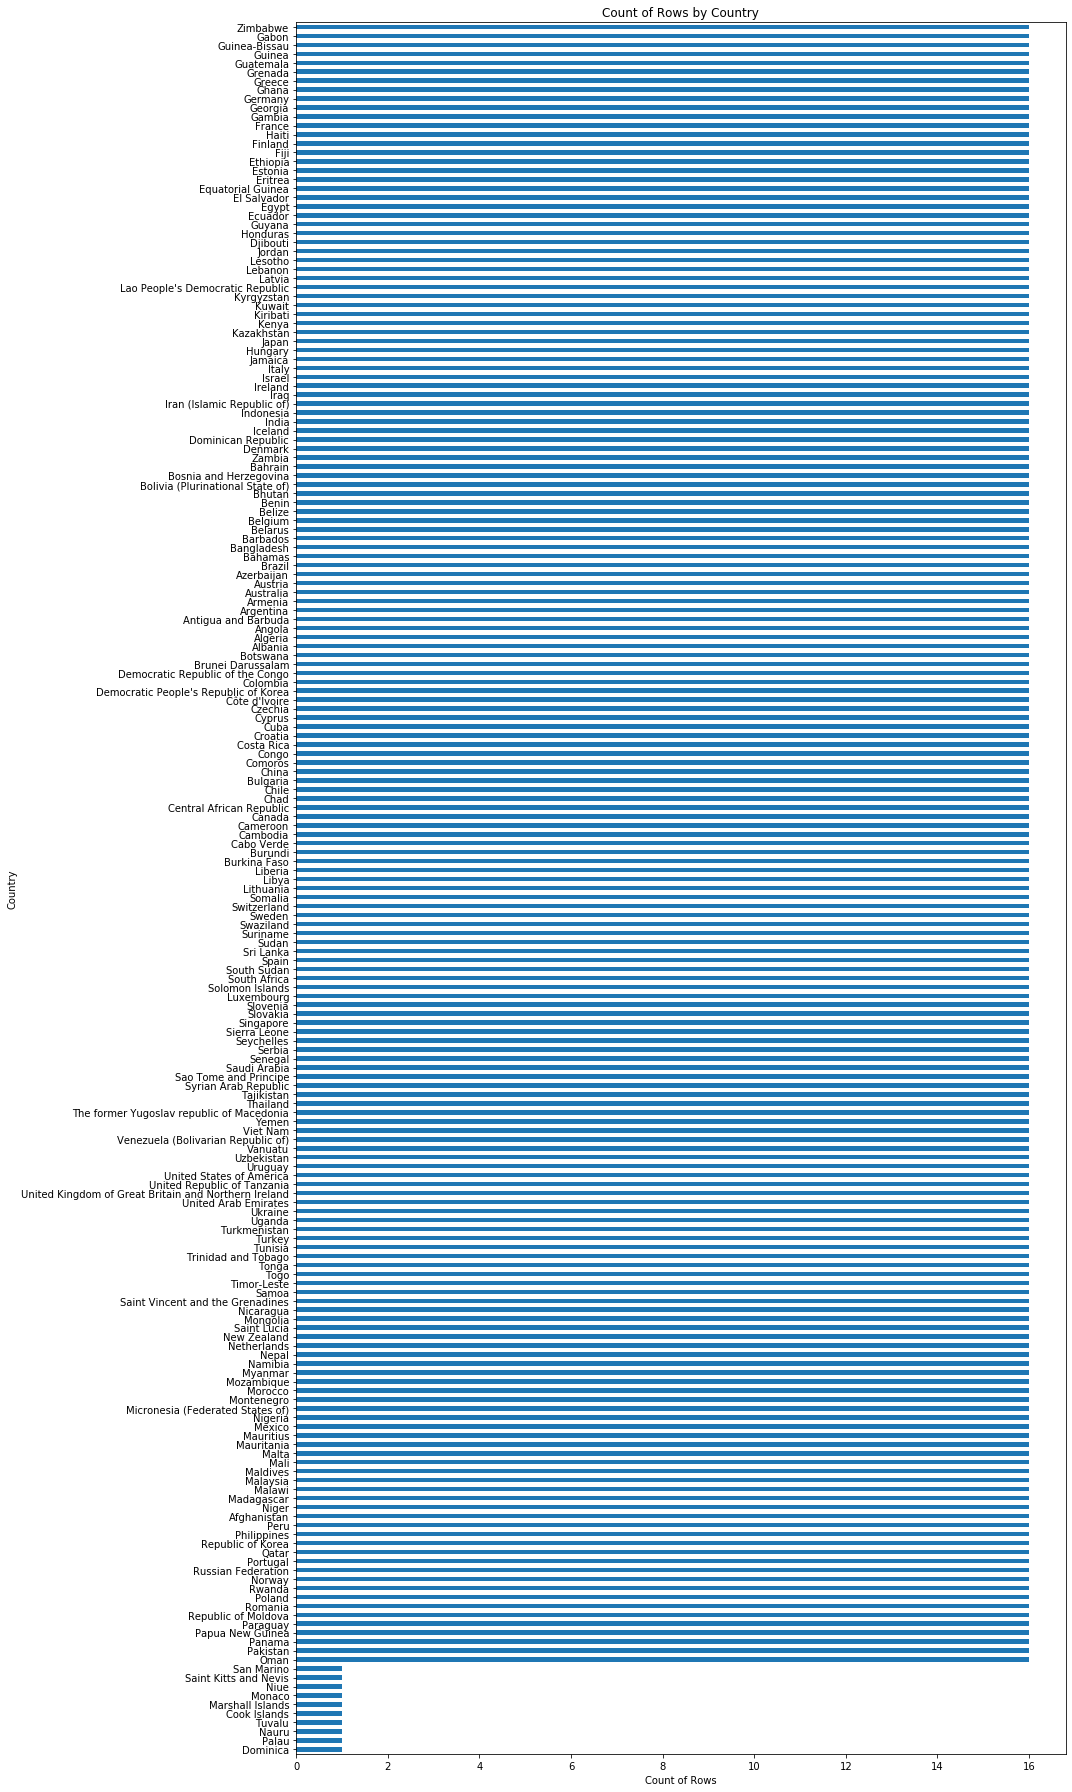

In [15]:
plt.figure(figsize=(15, 25))

life_data.Country.value_counts(ascending=True).plot(kind='barh')
plt.title('Count of Rows by Country')
plt.xlabel('Count of Rows')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

대부분 국가들이 16개의 행을 갖고 있음

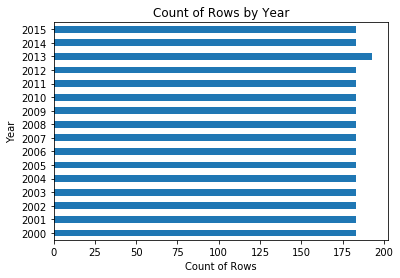

In [16]:
life_data.Year.value_counts().sort_index().plot(kind='barh')

plt.title('Count of Rows by Year')
plt.xlabel('Count of Rows')
plt.ylabel('Year')
plt.show()

2013년만 행의 개수가 10개 더 많음

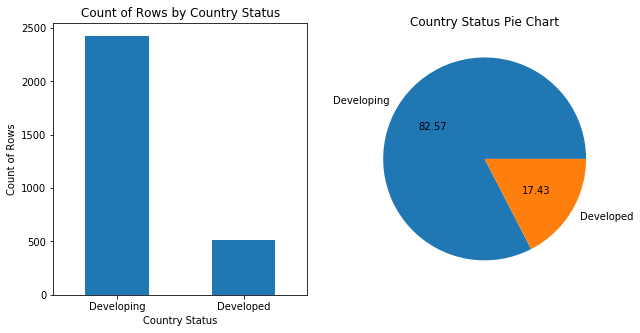

In [17]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
life_data.Status.value_counts().plot(kind='bar')
plt.title('Count of Rows by Country Status')
plt.xlabel('Country Status')
plt.ylabel('Count of Rows')
plt.xticks(rotation=0)

plt.subplot(122)
life_data.Status.value_counts().plot(kind='pie', autopct='%.2f')
plt.ylabel('')
plt.title('Country Status Pie Chart')

plt.show()

개발도상국의 데이터가 선진국보다 훨씬 많다.

Text(0.5, 1.0, 'Boxplot of Status and Life Expectancy')

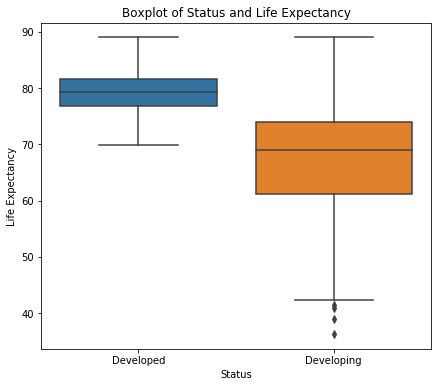

In [18]:
plt.figure(figsize=(7,6))
plot = sns.boxplot(x='Status',y='Life_Expectancy',data=life_data)
plot.set_xlabel("Status")
plot.set_ylabel("Life Expectancy")
plot.set_title("Boxplot of Status and Life Expectancy")

개발도상국과 선진국의 기대수명 평균값의 차이가 있어 보인다.  

### developed와 developing으로 데이터 분류

In [19]:
developed_data = life_data[life_data.Status == 'Developed']
developing_data = life_data[life_data.Status == 'Developing']

In [20]:
# 개발도상국 데이터
developing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2426 entries, 0 to 2937
Data columns (total 21 columns):
Country                            2426 non-null category
Year                               2426 non-null int64
Status                             2426 non-null category
Life_Expectancy                    2426 non-null float64
Adult_Mortality                    2426 non-null float64
Infant_Deaths                      2426 non-null int64
Alcohol                            2426 non-null float64
Percentage_Expenditure             2426 non-null float64
Hepatitis_B                        2426 non-null float64
Measles                            2426 non-null int64
Under5_Deaths                      2426 non-null int64
Polio                              2426 non-null float64
Total_Expenditure                  2426 non-null float64
Diphtheria                         2426 non-null float64
HIV_AIDS                           2426 non-null float64
GDP                                2426 non-

In [21]:
# 선진국 데이터
developed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 112 to 2809
Data columns (total 21 columns):
Country                            512 non-null category
Year                               512 non-null int64
Status                             512 non-null category
Life_Expectancy                    512 non-null float64
Adult_Mortality                    512 non-null float64
Infant_Deaths                      512 non-null int64
Alcohol                            512 non-null float64
Percentage_Expenditure             512 non-null float64
Hepatitis_B                        512 non-null float64
Measles                            512 non-null int64
Under5_Deaths                      512 non-null int64
Polio                              512 non-null float64
Total_Expenditure                  512 non-null float64
Diphtheria                         512 non-null float64
HIV_AIDS                           512 non-null float64
GDP                                512 non-null float64
Po

## 상관관계

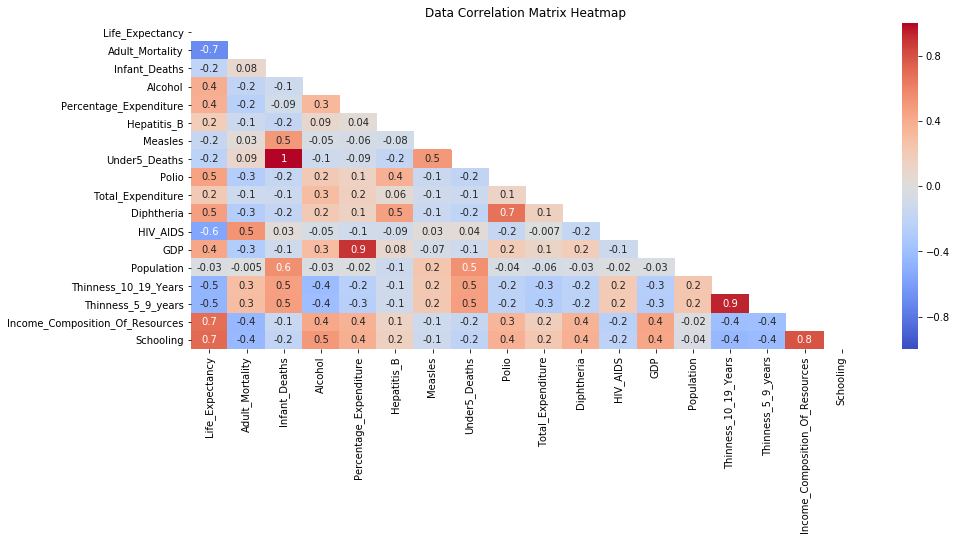

In [22]:
mask = np.triu(life_data[var].corr())

plt.figure(figsize=(15,6))
sns.heatmap(life_data[var].corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
plt.ylim(18, 0)
plt.title('Data Correlation Matrix Heatmap')
plt.show()

### Developing Data

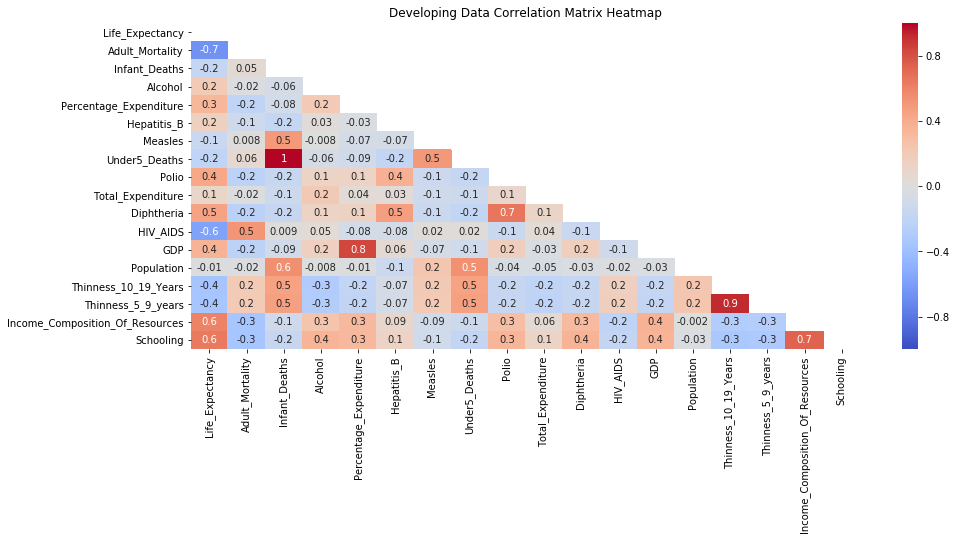

In [23]:
mask = np.triu(developing_data[var].corr())

plt.figure(figsize=(15,6))
sns.heatmap(developing_data[var].corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
plt.ylim(18, 0)
plt.title('Developing Data Correlation Matrix Heatmap')
plt.show()

기대수명과 가장 높은 상관관계를 보이는 변수 : 유아가 HIV 또는 AIDS로 사망하는 비율 변수. (상관계수 = -0.8)

### Developed Data

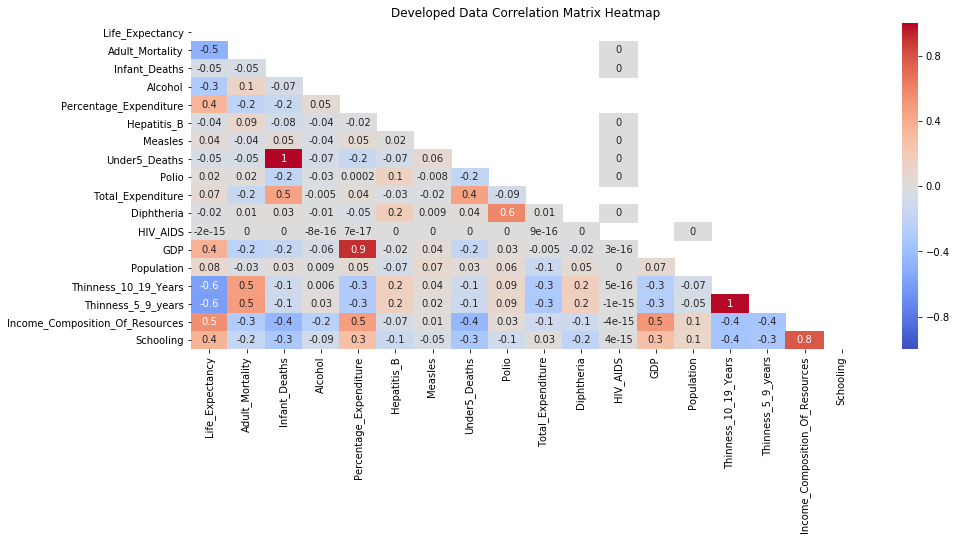

In [24]:
mask = np.triu(developed_data[var].corr())

plt.figure(figsize=(15,6))
sns.heatmap(developed_data[var].corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
plt.ylim(18, 0)
plt.title('Developed Data Correlation Matrix Heatmap')
plt.show()

기대수명과 가장 높은 상관관계를 보이는 변수 : 10세-19세 또는 5세-9세 사람이 야윈 비율 변수. (상관계수 = -0.6)